In [89]:
import random
import os
from urllib import request

# Resources

In order to run this notebook, you first need the following: 

## The _Don't Patronize Me!_ dataset

Files contained in the _Don't Patronize Me!_ data file, which you can access from [here](https://github.com/Perez-AlmendrosC/dontpatronizeme) (you need to fill a short form and it will be sent to you).

## The `dont_patronize_me.py` module

You can get this file by running the cell below.

In [90]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


## The official scorer

The script `evaluation.py` can also be obtained by running the cell below:

In [91]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


At this point, your left pane on Google Colab should look like this:

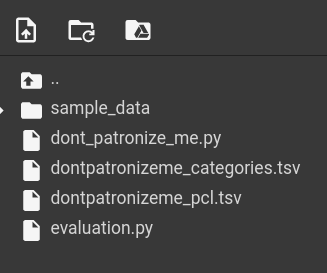

In [92]:
from dont_patronize_me import DontPatronizeMe
# Initialize a dpm (Don't Patronize Me) object.
# It takes two arguments as input: 
# (1) Path to the training set, which is the root directory of this notebook.
# (2) Path to the test set, which will be released when the evaluation phase begins. 
# For now, you can just use the dataset for Subtask 1, which the code will load without labels.
dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

# Load Subtask 1 data

Note that the original dataset contains fine-grained tags (0 to 4, both inclusive). The data manager we provide collapses them into binary labels, which is the labeling we use for the task.

In [93]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
dpm.train_task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0


# Load Subtask 2 data

Similarly, you can use our data manager code to have a binary vector representing the labels of each paragraph in the multilabel classification subtask (PCL categories, Subtask 2).

In [94]:
# Same for subtask 2, we must pass return_one_hot=True to the constructor to get valid labels
dpm.load_task2(return_one_hot=True)
# which we can then access as a dataframe
dpm.train_task2_df.head()

{'Authority_voice': 0, 'Unbalanced_power_relations': 1, 'Shallow_solution': 2, 'Presupposition': 3, 'Compassion': 4, 'Metaphors': 5, 'The_poorer_the_merrier': 6}


,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 1, 0, 0, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 0, 1, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 1, 0, 0, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[0, 1, 0, 0, 0, 0, 0]"


In [95]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

# Generate predictions

In this example, our code will just generate a bunch of random predictions for both subtasks.

In [96]:
# first, we need to create the res/ and ref/ folders which the evaluator expects
!rm -r ref res
!mkdir ref res

In [97]:
dpm.load_test()

In [98]:
preds_task1 = [[random.randint(0,1)] for k in range(0,len(dpm.test_set))]
labels2file(preds_task1, os.path.join('res/', 'task1.txt'))

In [99]:
preds_task2 = [[random.choice([0,1]) for k in range(7)] for k in range(0,len(dpm.test_set))]
labels2file(preds_task2, os.path.join('res/', 'task2.txt'))

# Evaluate predictions

After generating two prediction files (`task1.txt` and `task2.txt`), we can just call the scorer (`evaluation.py`), which will generate a `scores.txt` file.

## Get gold labels

We will use the gold labels of the training set and compare our random predictions to them.

In [100]:
# for subtask 1
labels2file(dpm.train_task1_df.label.apply(lambda x:[x]).tolist(), os.path.join('ref/', 'task1.txt'))
# and for subtask 2
labels2file(dpm.train_task2_df.label.tolist(), os.path.join('ref/', 'task2.txt'))

## Call task scorer and print results

In [101]:
# Now, we can just call the official scorer, which takes an input_directory and an output_directory
# as arguments
!python3 evaluation.py . .

In [102]:
# And get the results
!cat scores.txt

task1_precision:0.09536423841059603
task1_recall:0.5075528700906344
task1_f1:0.16056068811723478
task2_unb:0.3300423131170662
task2_sha:0.570957095709571
task2_pre:0.27900146842878115
task2_aut:0.31092436974789917
task2_met:0.474468085106383
task2_com:0.3105950653120464
task2_the:0.06367041198501873
task2_avg:0.3342369727723951
